# Lab 7: Simple Linear Regression
In this tutorial, we will walk through different steps of linear regression modeling introduced in the lecture. We will be working on __The World Happiness Dataset__ from Kaggle website:<br>
https://www.kaggle.com/unsdsn/world-happiness <br>
You will need to modify and combine these steps into several functions for the Assignment.

In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.optimize as so
import pandas as pd 
import numpy as np

## Import the dataset

In [4]:
# we will be workin on the dataset from 2019
df = pd.read_csv('2019.csv')

In [5]:
# overal inspection of the dataset
## the first 5 rows
display(df.head())

## print out the number of columns
print(df.columns)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


## Relationship between Happiness score and other variables
Here, we will be using scatter plots to have a quick look at the relationship between Happiness score of countries and other variables reported in the dataset. <br>
What do you think about the relationship between the happiness score and the variable on the y-axis?

Text(0, 0.5, 'Generosity score')

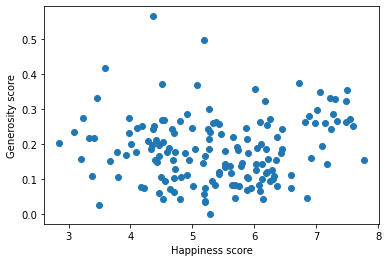

In [6]:
# Generosity vs Score
plt.scatter(df['Score'], df['Generosity'])
plt.xlabel('Happiness score')
plt.ylabel('Generosity score')

Text(0, 0.5, 'Social support')

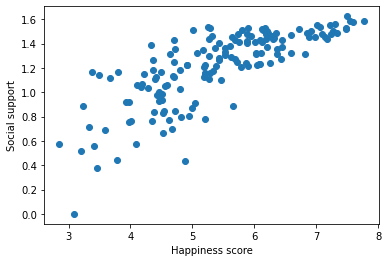

In [7]:
# Social support vs Score
plt.scatter(df['Score'], df['Social support'])
plt.xlabel('Happiness score')
plt.ylabel('Social support')

Text(0, 0.5, 'Healthy life expectancy')

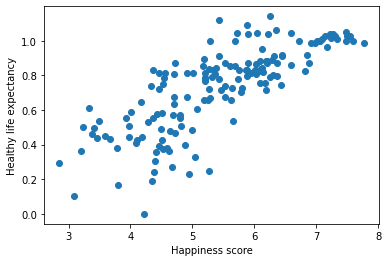

In [10]:
# Healthy life expectancy vs Score
plt.scatter(df['Score'], df['Healthy life expectancy'])
plt.xlabel('Happiness score')
plt.ylabel('Healthy life expectancy')

Text(0, 0.5, 'Freedom to make life choices')

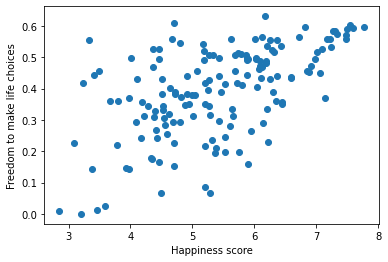

In [8]:
# Freedom to make life choices vs Score
plt.scatter(df['Score'], df['Freedom to make life choices'])
plt.xlabel('Happiness score')
plt.ylabel('Freedom to make life choices')

Text(0, 0.5, 'Perceptions of corruption')

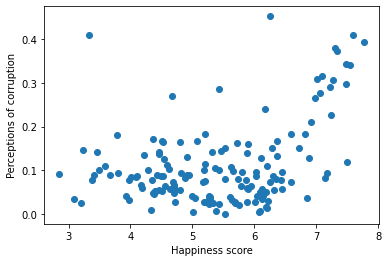

In [9]:
# Perceptions of corruption vs Score
plt.scatter(df['Score'], df['Perceptions of corruption'])
plt.xlabel('Happiness score')
plt.ylabel('Perceptions of corruption')

## Fit a linear regression line "by hand"
Let's take a closet look at the relationship between Happiness Score and Healthy life expectancy.<br>
We will fit a linear regression line to the data.<br>
The formula: _y = b0 + b1*x_

In [11]:
# define x and y
xs = df['Score']
yh = df['Healthy life expectancy']

In [12]:
# Regression formula
## Don't forget printting the type and size of arrays 
def simpleRegPredict(b, x):
    # takes in b (regression coefficient) and x and returns the ys prected by a
    # simple linear regression model.
    yp = b[0] + b[1]*x
    return yp

### Playing around with regression coefficients
We'll be using the simpleregPredict function to predict y-values

#### 1. do the scatter plot
plot _Healthy life expectancy_ against _Score_

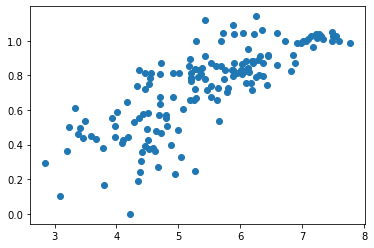

In [13]:
# create a figure object
# we will be using the same "figure object" for scatterplot and plotting the regression line
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)
ax.scatter(xs, yh)

#### 2. plot a linear regression line 
We will do this step for different regression coefficient arrays

In [17]:
# examine different regression coefficients

## create an array for x
xp = np.linspace(min(xs), max(xs), num = len(xs))

## the first b
b1  = [1, 0]
yp1 = simpleRegPredict(b1, xp)

## the second b :)
b2  = [0.01, 0.1] # [0, 0.5]
yp2 = simpleRegPredict(b2, xp)

#### 3. plot the regression line for the two regression models on top of the scatter plot
* when plotting the linear regression, we will create a new "x" array and use it for plotting

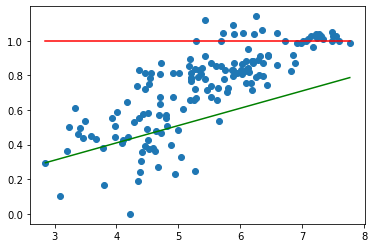

In [20]:
plt.scatter(xs, yh)
plt.plot(xp, yp1, color = 'red')
plt.plot(xp, yp2, color = 'green')

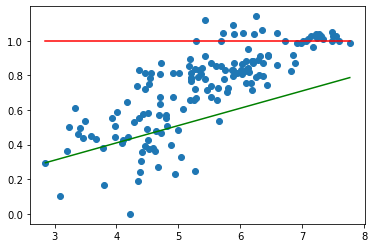

In [18]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)
ax.scatter(xs, yh)
ax.plot(xp, yp1, color = 'red')
ax.plot(xp, yp2, color = 'green')

### Define the _Residual Sum of Squares_ loss function using the derivatives
We can go on forever, playaround with the coefficients and look at the line! But that's neither efficient nor optimal! So we will take on another approach!<br>
We will define a __loss__ function and try to find the coefficients for which this __loss__ function becomes minimum. The function will take in the regression coefficient array, x, and y and returns both the __rss__ and __derivative array__
Then it should do the following steps:
* use b and x as inputs to the linear regression function and get the predicted y values
* calculate the derivatives

In [ ]:
# a pseudo code for the function:
# use b (parameters of the regression model) and x to predict the y values
# calculate the residuals (difference between the real and predicted y values)
# calculate the derivatives with respect to each parameter (regression coefficient)

#### Calculate the derivatives of rss with respect to each coefficients
As we are trying to find the parameters for which the __loss__ function is minimized, we will take the derivative of the __loss__ function with respect to each coef. and set it equal to zero!<br>
Lets derive the derivatives:<br>

RSS = sum((yh - (b0 + b1*x))**2)

In [21]:
# first, initialize the derivative array
## as we only have two parameters (regression coefficients: intercept and slope):
deriv = np.zeros((1, 2))
print(deriv.shape)

# calculate the residuals
res = yh - yp2 

# derivative of the loss function with respect to b0 (the interceot)
deriv[0, 0] = -2*sum(res)
print('deriv 0 is %d ' % deriv[0, 0])

# derivative of the loss function with respect to b1 (the slope)
deriv[0, 1] = -2*sum(xs*res)
print('deriv 1 is %d ' % deriv[0, 1])

(1, 2)
deriv 0 is -57 
deriv 1 is -424 


#### Increase the parameter or decrease it?
Based on the derivatives calculated you need to decide whether to increase or decrease the parameter.<br>
* if the derivative for a parameter is negative, then you will increase that parameter
* if the derivative for a parameter is positive, then you will decrease the parameter

In [33]:
# take a look at b2 again
print(b2)

[0.01, 0.1]


(9.24347031, array([ -54.4546   , -321.1896358]))
(5.726745547500001, array([ 36.1361   , 187.8480453]))
(6.146626753099999, array([ -34.46446   , -209.26001558]))
(4.445252398400001, array([ -16.03432   , -105.76546536]))
(4.020674921874999, array([ -6.97525   , -54.86169725]))
(3.8659596959, array([ 1.61582   , -6.48845014]))


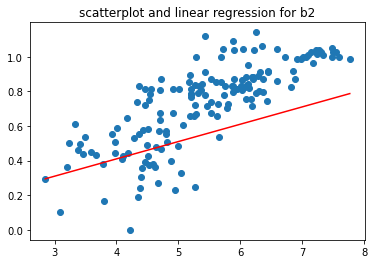

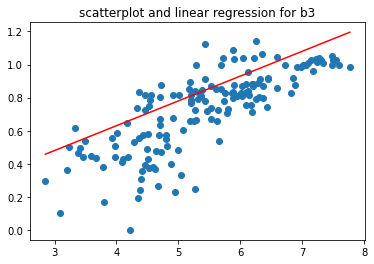

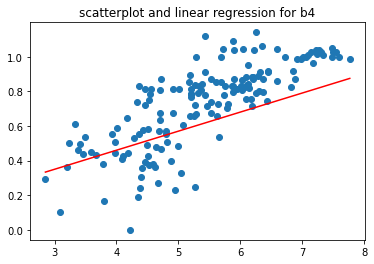

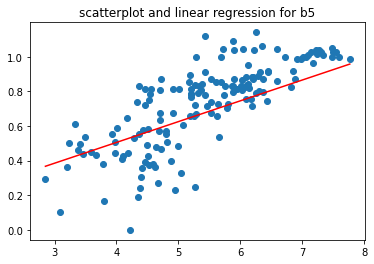

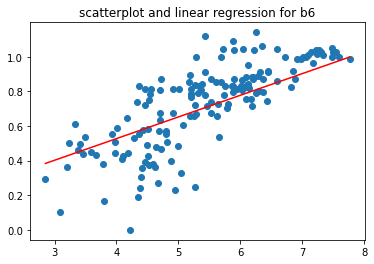

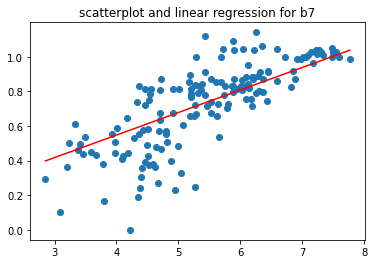

In [34]:
# Trying out different bs
b2 = [0.01, 0.1]
plotPrediction(b2,xs,yh,predictFcn=simpleRegPredict)
plt.title('scatterplot and linear regression for b2')
print(simpleRegLossRSS(b2,xs,yh))

# increasing both intercept and slope
b3 = [0.03, 0.15]
plotPrediction(b3,xs,yh,predictFcn=simpleRegPredict)
plt.title('scatterplot and linear regression for b3')
print(simpleRegLossRSS(b3,xs,yh))

# decreasing both intercept and slope
b4 = [0.02, 0.11]
plotPrediction(b4,xs,yh,predictFcn=simpleRegPredict)
plt.title('scatterplot and linear regression for b4')
print(simpleRegLossRSS(b4,xs,yh))

# decreasing both intercept and slope
b5 = [0.025, 0.12]
plotPrediction(b5,xs,yh,predictFcn=simpleRegPredict)
plt.title('scatterplot and linear regression for b5')
print(simpleRegLossRSS(b5,xs,yh))

# decreasing both intercept and slope
b6 = [0.027, 0.125]
plotPrediction(b6,xs,yh,predictFcn=simpleRegPredict)
plt.title('scatterplot and linear regression for b6')
print(simpleRegLossRSS(b6,xs,yh))

# decreasing both intercept and slope
b7 = [0.0275, 0.13]
plotPrediction(b7,xs,yh,predictFcn=simpleRegPredict)
plt.title('scatterplot and linear regression for b7')
print(simpleRegLossRSS(b7,xs,yh))

### Using scipy.optimize.minimize to fit the linear regression line
Again, we can go on and on and try out different parameters to see which one is giving us the best answer (is the __loss__ getting smaller and smaller as you change the parameters?) <br>
Scipy provides you with a method to minimize the loss function. Make sure you go through the documentation:<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html <br>
Make sure you go through the document and understand the output fields

In [26]:
# making sure I have imported scipy optimize
import scipy.optimize as so

In [27]:
# define the loss function that scipy.optimize will be using to fit the model
loss_fcn = simpleRegLossRSS

# initialize the coefficients
b0       = np.zeros(2)
RESULT   = so.minimize(loss_fcn, b0, args=(xs, yh), jac=True)

# print out the result
RESULT

      fun: 3.5600176789619136
 hess_inv: array([[ 0.96939802, -0.1722394 ],
       [-0.1722394 ,  0.03070812]])
      jac: array([1.84630089e-13, 9.94485744e-13])
  message: 'Optimization terminated successfully.'
     nfev: 5
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([-0.19201024,  0.1696389 ])

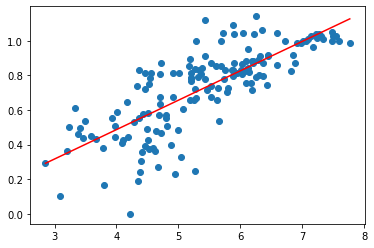

In [31]:
# scatter plot and the regression line
b = RESULT.x
plotPrediction(b, xs, yh,predictFcn=simpleRegPredict)

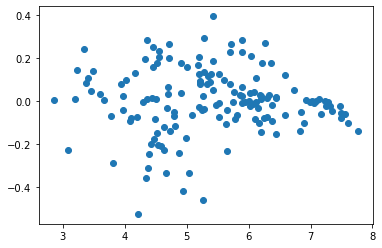

In [35]:
# plotting the residuals vs x
ypred = simpleRegPredict(b, xs)
res   = yh - ypred

plt.scatter(xs, res)


### Calculating R2 
R2 = 1 - (RSS/TSS) <br>
* TSS is the total sum of squares
* RSS is the residual sum of squares

In [32]:
# lets calculate the R2 with the best model
b = RESULT.x # b = [-0.19201, 0.1696389]

# # get the RSS using the loss function
# [RSS, deriv] = simpleRegLossRSS(b,x,y)
# print('the RSS value is %f' % RSS)

# # get the TSS value
# TSS = sum((y - np.mean(y))**2)
# print('the TSS value is %f' % TSS)

# # calculate R2
# R2 = 1 - (RSS/TSS)
# print('The R2 value is %f' % R2)

# As you don't have the function for getting the loss and derivative here,
# to show you how it works, I am going through the following steps
## get the predicted values from the model 
yp = simpleRegPredict(b, xs)

## calculate the residuals
res = yh - yp

## calculate the sums of squares of residuals
RSS = sum(res**2)
print('the RSS value is %f' % RSS)

## calculate total sums of squares
TSS = sum((yh - np.mean(yh))**2)
print('the TSS value is %f' % TSS)

## calculate R2
R2 = 1 - (RSS/TSS)
print('The R2 value is %f' % R2)


the RSS value is 3.560018
the TSS value is 9.086725
The R2 value is 0.608218
